In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading File as DataFrame
Covid_cases=pd.read_csv("D:\Projects\Covid\Input\COVID19_Cases.csv")

Testing=pd.read_csv("D:\Projects\Covid\Input\StatewiseTestingDetails.csv")

Vaccine=pd.read_csv("D:\Projects\Covid\Input\covid_vaccine_statewise.csv")

#I have 3 csv files containing data for covid cases, testing and vaccine details 

In [3]:
Covid_cases.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,01/01/1970,India,26766298,323025.0,26138541.0,304732.0
1,2,12/03/2020,India,74,71.0,3.0,0.0
2,3,13/03/2020,India,75,71.0,3.0,1.0
3,4,14/03/2020,India,84,72.0,10.0,2.0
4,5,15/03/2020,India,107,95.0,10.0,2.0


In [4]:
Testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [5]:
Vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [6]:
#All 3 files needs lot of data cleaning
#Covid cases and testing data will be cleaned and joined together using pandas
#Vaccination started late, so to keep things simple, that data will be cleaned separately and joined in tableau while importing 

In [7]:
#File1: Covid Cases
Covid_cases.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,01/01/1970,India,26766298,323025.0,26138541.0,304732.0
1,2,12/03/2020,India,74,71.0,3.0,0.0
2,3,13/03/2020,India,75,71.0,3.0,1.0
3,4,14/03/2020,India,84,72.0,10.0,2.0
4,5,15/03/2020,India,107,95.0,10.0,2.0


In [8]:
#Checking Dimenssion of Dataframe
Covid_cases.shape

(21543, 7)

In [9]:
#Checking Data Types
Covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S. No.            21543 non-null  int64  
 1   Date              21543 non-null  object 
 2   Region            21543 non-null  object 
 3   Confirmed Cases   21543 non-null  int64  
 4   Active Cases      20955 non-null  float64
 5   Cured/Discharged  20954 non-null  float64
 6   Death             21542 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.2+ MB


In [10]:
#Checking Nulls
Covid_cases.isna().sum()

S. No.                0
Date                  0
Region                0
Confirmed Cases       0
Active Cases        588
Cured/Discharged    589
Death                 1
dtype: int64

In [11]:
#unique count
Covid_cases.nunique()

S. No.              21543
Date                  595
Region                 39
Confirmed Cases     18106
Active Cases        10865
Cured/Discharged    16982
Death                8264
dtype: int64

In [12]:
Covid_cases["Date"].unique()
# 01/01/1970 is wrong date

array(['01/01/1970', '12/03/2020', '13/03/2020', '14/03/2020',
       '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020',
       '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020',
       '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020',
       '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020',
       '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020',
       '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020',
       '08/04/2020', '09/04/2020', '10/04/2020', '11/04/2020',
       '12/04/2020', '13/04/2020', '14/04/2020', '15/04/2020',
       '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020',
       '20/04/2020', '21/04/2020', '22/04/2020', '23/04/2020',
       '24/04/2020', '25/04/2020', '26/04/2020', '27/04/2020',
       '28/04/2020', '29/04/2020', '30/04/2020', '01/05/2020',
       '02/05/2020', '03/05/2020', '04/05/2020', '05/05/2020',
       '06/05/2020', '07/05/2020', '08/05/2020', '09/05/2020',
       '10/05/2020', '11/05/2020', '12/05/2020', '13/05

In [13]:
#Deleting all rows with date as "01/01/1970"
to_delete1=Covid_cases[Covid_cases["Date"]=="01/01/1970"].index
Covid_cases.drop(to_delete1,axis=0,inplace=True)
Covid_cases["Date"].unique()

array(['12/03/2020', '13/03/2020', '14/03/2020', '15/03/2020',
       '16/03/2020', '17/03/2020', '18/03/2020', '19/03/2020',
       '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020',
       '24/03/2020', '25/03/2020', '26/03/2020', '27/03/2020',
       '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020',
       '01/04/2020', '02/04/2020', '03/04/2020', '04/04/2020',
       '05/04/2020', '06/04/2020', '07/04/2020', '08/04/2020',
       '09/04/2020', '10/04/2020', '11/04/2020', '12/04/2020',
       '13/04/2020', '14/04/2020', '15/04/2020', '16/04/2020',
       '17/04/2020', '18/04/2020', '19/04/2020', '20/04/2020',
       '21/04/2020', '22/04/2020', '23/04/2020', '24/04/2020',
       '25/04/2020', '26/04/2020', '27/04/2020', '28/04/2020',
       '29/04/2020', '30/04/2020', '01/05/2020', '02/05/2020',
       '03/05/2020', '04/05/2020', '05/05/2020', '06/05/2020',
       '07/05/2020', '08/05/2020', '09/05/2020', '10/05/2020',
       '11/05/2020', '12/05/2020', '13/05/2020', '14/05

In [14]:
Covid_cases["Region"].unique()
#I dont want data for world, India and State assignment pending

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'State assignment pending',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'World'], dtype=object)

In [15]:
to_delete2=Covid_cases[Covid_cases["Region"]=="World"].index
Covid_cases.drop(to_delete2,axis=0,inplace=True)

to_delete3=Covid_cases[Covid_cases["Region"]=="India"].index
Covid_cases.drop(to_delete3,axis=0,inplace=True)

to_delete4=Covid_cases[Covid_cases["Region"]=="State assignment pending"].index
Covid_cases.drop(to_delete4,axis=0,inplace=True)

Covid_cases["Region"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [16]:
Covid_cases["Region"].nunique()
#Total 36 Indian States will be analysed

36

In [17]:
#Checking nulls again
Covid_cases.isna().sum()

S. No.              0
Date                0
Region              0
Confirmed Cases     0
Active Cases        0
Cured/Discharged    0
Death               0
dtype: int64

In [18]:
#Checking Column Names
Covid_cases.columns

Index(['S. No.', 'Date', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [19]:
#Dropping Serial Number
Covid_cases.drop("S. No.",axis=1,inplace=True)
Covid_cases.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
581,27/03/2020,Andaman and Nicobar Islands,1,1.0,0.0,0.0
582,28/03/2020,Andaman and Nicobar Islands,6,6.0,0.0,0.0
583,29/03/2020,Andaman and Nicobar Islands,9,9.0,0.0,0.0
584,30/03/2020,Andaman and Nicobar Islands,9,9.0,0.0,0.0
585,31/03/2020,Andaman and Nicobar Islands,10,10.0,0.0,0.0


In [20]:
#renaming Column names
Covid_cases.rename({"Confirmed Cases":"CMLT_Confirmed","Active Cases":"CMLT_Active",
          "Cured/Discharged":"CMLT_Discharged","Death":"CMLT_Death"},axis=1,inplace=True)
Covid_cases.head()


#Data we have is cumulative data for each state

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death
581,27/03/2020,Andaman and Nicobar Islands,1,1.0,0.0,0.0
582,28/03/2020,Andaman and Nicobar Islands,6,6.0,0.0,0.0
583,29/03/2020,Andaman and Nicobar Islands,9,9.0,0.0,0.0
584,30/03/2020,Andaman and Nicobar Islands,9,9.0,0.0,0.0
585,31/03/2020,Andaman and Nicobar Islands,10,10.0,0.0,0.0


In [21]:
#reset index
Covid_cases.index=list(range(Covid_cases.shape[0]))
Covid_cases.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death
0,27/03/2020,Andaman and Nicobar Islands,1,1.0,0.0,0.0
1,28/03/2020,Andaman and Nicobar Islands,6,6.0,0.0,0.0
2,29/03/2020,Andaman and Nicobar Islands,9,9.0,0.0,0.0
3,30/03/2020,Andaman and Nicobar Islands,9,9.0,0.0,0.0
4,31/03/2020,Andaman and Nicobar Islands,10,10.0,0.0,0.0


In [22]:
#Date date type should be datetime64, In this case date format is not standard (date is mentioned first)
Covid_cases['Date']=pd.to_datetime(Covid_cases["Date"],dayfirst=True)
Covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20252 entries, 0 to 20251
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             20252 non-null  datetime64[ns]
 1   Region           20252 non-null  object        
 2   CMLT_Confirmed   20252 non-null  int64         
 3   CMLT_Active      20252 non-null  float64       
 4   CMLT_Discharged  20252 non-null  float64       
 5   CMLT_Death       20252 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.1+ MB


In [23]:
Covid_cases.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death
0,2020-03-27,Andaman and Nicobar Islands,1,1.0,0.0,0.0
1,2020-03-28,Andaman and Nicobar Islands,6,6.0,0.0,0.0
2,2020-03-29,Andaman and Nicobar Islands,9,9.0,0.0,0.0
3,2020-03-30,Andaman and Nicobar Islands,9,9.0,0.0,0.0
4,2020-03-31,Andaman and Nicobar Islands,10,10.0,0.0,0.0


In [24]:
#File2: Testing Data
Testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [25]:
#Checking Dimenssion of Dataframe
Testing.shape

(16336, 5)

In [26]:
#Checking Nulls
Testing.isna().sum()

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [27]:
#we dont need positive and negative columns as it has nulls and positive cases we can get from covid cases data also
Testing.drop(["Negative","Positive"],axis=1,inplace=True)

In [28]:
#Changing date data type
Testing["Date"]=Testing["Date"].astype("datetime64")

In [29]:
#Renaming State as Region so that both tables can be joined using Date and State
Testing.rename({"State":"Region"},axis=1,inplace=True)
Testing.head()

,Date,Region,TotalSamples
0,2020-04-17,Andaman and Nicobar Islands,1403.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0


In [30]:
#Now Lets join Covid Cases and Testing Data

In [31]:
#Merge Covid Cases Data with Testing Data 
Covid=pd.merge(Covid_cases,Testing, on=["Date","Region"],how="left")
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,TotalSamples
0,2020-03-27,Andaman and Nicobar Islands,1,1.0,0.0,0.0,NaN
1,2020-03-28,Andaman and Nicobar Islands,6,6.0,0.0,0.0,NaN
2,2020-03-29,Andaman and Nicobar Islands,9,9.0,0.0,0.0,NaN
3,2020-03-30,Andaman and Nicobar Islands,9,9.0,0.0,0.0,NaN
4,2020-03-31,Andaman and Nicobar Islands,10,10.0,0.0,0.0,NaN


In [32]:
#Renaming Total Samples as Cumulitive Samples
Covid.rename({"TotalSamples":"CMLT_Samples"},axis=1,inplace=True)
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples
0,2020-03-27,Andaman and Nicobar Islands,1,1.0,0.0,0.0,NaN
1,2020-03-28,Andaman and Nicobar Islands,6,6.0,0.0,0.0,NaN
2,2020-03-29,Andaman and Nicobar Islands,9,9.0,0.0,0.0,NaN
3,2020-03-30,Andaman and Nicobar Islands,9,9.0,0.0,0.0,NaN
4,2020-03-31,Andaman and Nicobar Islands,10,10.0,0.0,0.0,NaN


In [33]:
#We Dont have Data of all dates for Testing. so left joining on Covid_cases will generate nulls
Covid.isna().sum()

Date                  0
Region                0
CMLT_Confirmed        0
CMLT_Active           0
CMLT_Discharged       0
CMLT_Death            0
CMLT_Samples       4459
dtype: int64

In [34]:
#No of unique regions
Covid["Region"].nunique()

36

In [35]:
#Replacing space with underscore
print("BEFORE",Covid["Region"].unique())
Covid["Region"]=Covid["Region"].str.replace(" ","_")
print()
print("AFTER",Covid["Region"].unique())

BEFORE ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']

AFTER ['Andaman_and_Nicobar_Islands' 'Andhra_Pradesh' 'Arunachal_Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra_and_Nagar_Haveli_and_Daman_and_Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal_Pradesh' 'Jammu_and_Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya_Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil_Nadu' 'Telangana' 'Tripura' 'Uttar_Pradesh'
 'Uttarakhand' 'West_B

In [36]:
#Checking Nulls for total samples, statewise
regions=Covid["Region"].unique()
for i in regions:
    print(i)
    print(Covid[Covid["Region"]==i].isna().sum())

Andaman_and_Nicobar_Islands
Date                 0
Region               0
CMLT_Confirmed       0
CMLT_Active          0
CMLT_Discharged      0
CMLT_Death           0
CMLT_Samples       125
dtype: int64
Andhra_Pradesh
Date                 0
Region               0
CMLT_Confirmed       0
CMLT_Active          0
CMLT_Discharged      0
CMLT_Death           0
CMLT_Samples       105
dtype: int64
Arunachal_Pradesh
Date                0
Region              0
CMLT_Confirmed      0
CMLT_Active         0
CMLT_Discharged     0
CMLT_Death          0
CMLT_Samples       94
dtype: int64
Assam
Date                 0
Region               0
CMLT_Confirmed       0
CMLT_Active          0
CMLT_Discharged      0
CMLT_Death           0
CMLT_Samples       103
dtype: int64
Bihar
Date                0
Region              0
CMLT_Confirmed      0
CMLT_Active         0
CMLT_Discharged     0
CMLT_Death          0
CMLT_Samples       94
dtype: int64
Chandigarh
Date                 0
Region               0
CMLT_Confirmed

In [37]:
#All Data given is cumulative, We need to transform data into daily
#Trial on maharashtra

df_MH=Covid[Covid["Region"]=="Maharashtra"]
df_MH.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples
11237,2020-03-12,Maharashtra,11,11.0,0.0,0.0,NaN
11238,2020-03-13,Maharashtra,11,11.0,0.0,0.0,NaN
11239,2020-03-14,Maharashtra,14,14.0,0.0,0.0,NaN
11240,2020-03-15,Maharashtra,31,31.0,0.0,0.0,NaN
11241,2020-03-16,Maharashtra,32,32.0,0.0,0.0,NaN


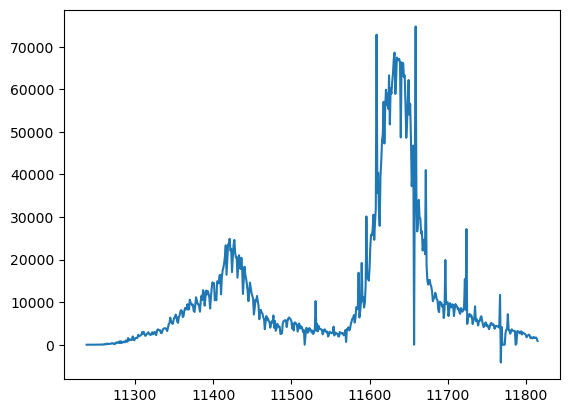

In [38]:
#Graphical representation of daily data
plt.plot(df_MH["CMLT_Confirmed"].diff())

#diff function is used to get difference between 2 consecutive records (Daily data)

In [39]:
#Given Data is Statewise, so while using diff(), we need to segregate data statewise
#For 4 columns, Daily Data will be calculated
#For Active Cases we need cumulative data only, so will be kept same

In [40]:
#Finding Daily Confirmed Cases

#Step1: 
def fun(x):
    return x["CMLT_Confirmed"].diff()

#step2:apply above function statewise
temp=Covid.groupby("Region").apply(fun)
temp

Region                            
Andaman_and_Nicobar_Islands  0           NaN
                             1           5.0
                             2           3.0
                             3           0.0
                             4           1.0
                                       ...  
West_Bengal                  20248     833.0
                             20249     846.0
                             20250     974.0
                             20251     -11.0
                             20252    1805.0
Name: CMLT_Confirmed, Length: 20253, dtype: float64

In [41]:
#Step3: Keeping only required data in lst
pd.DataFrame(temp)
lst=pd.DataFrame(temp)["CMLT_Confirmed"].reset_index()["CMLT_Confirmed"]

#Step4: Adding new Column in dataframe
Covid["Daily_Confirmed"]=lst
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples,Daily_Confirmed
0,2020-03-27,Andaman_and_Nicobar_Islands,1,1.0,0.0,0.0,NaN,NaN
1,2020-03-28,Andaman_and_Nicobar_Islands,6,6.0,0.0,0.0,NaN,5.0
2,2020-03-29,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,3.0
3,2020-03-30,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,0.0
4,2020-03-31,Andaman_and_Nicobar_Islands,10,10.0,0.0,0.0,NaN,1.0


In [42]:
#Step5:
#Each state has null value in Daily_Confirmed for first day.
#Lets replace only those rows with actual data
Covid.loc[Covid["Daily_Confirmed"].isna(),"Daily_Confirmed"]=Covid.loc[Covid["Daily_Confirmed"].isna(),"CMLT_Confirmed"]
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples,Daily_Confirmed
0,2020-03-27,Andaman_and_Nicobar_Islands,1,1.0,0.0,0.0,NaN,1.0
1,2020-03-28,Andaman_and_Nicobar_Islands,6,6.0,0.0,0.0,NaN,5.0
2,2020-03-29,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,3.0
3,2020-03-30,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,0.0
4,2020-03-31,Andaman_and_Nicobar_Islands,10,10.0,0.0,0.0,NaN,1.0


In [43]:
#Above Similar Steps will be used for other columns also

In [44]:
#Finding Daily Discharged Cases

def fun(x):
    return x["CMLT_Discharged"].diff()

temp=Covid.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["CMLT_Discharged"].reset_index()["CMLT_Discharged"]

Covid["Daily_Discharged"]=lst

Covid.loc[Covid["Daily_Discharged"].isna(),"Daily_Discharged"]=Covid.loc[Covid["Daily_Discharged"].isna(),"CMLT_Discharged"]
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples,Daily_Confirmed,Daily_Discharged
0,2020-03-27,Andaman_and_Nicobar_Islands,1,1.0,0.0,0.0,NaN,1.0,0.0
1,2020-03-28,Andaman_and_Nicobar_Islands,6,6.0,0.0,0.0,NaN,5.0,0.0
2,2020-03-29,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,3.0,0.0
3,2020-03-30,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,0.0,0.0
4,2020-03-31,Andaman_and_Nicobar_Islands,10,10.0,0.0,0.0,NaN,1.0,0.0


In [45]:
#Finding Daily Death Cases

def fun(x):
    return x["CMLT_Death"].diff()

temp=Covid.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["CMLT_Death"].reset_index()["CMLT_Death"]

Covid["Daily_Death"]=lst

Covid.loc[Covid["Daily_Death"].isna(),"Daily_Death"]=Covid.loc[Covid["Daily_Death"].isna(),"CMLT_Death"]
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples,Daily_Confirmed,Daily_Discharged,Daily_Death
0,2020-03-27,Andaman_and_Nicobar_Islands,1,1.0,0.0,0.0,NaN,1.0,0.0,0.0
1,2020-03-28,Andaman_and_Nicobar_Islands,6,6.0,0.0,0.0,NaN,5.0,0.0,0.0
2,2020-03-29,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,3.0,0.0,0.0
3,2020-03-30,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,0.0,0.0,0.0
4,2020-03-31,Andaman_and_Nicobar_Islands,10,10.0,0.0,0.0,NaN,1.0,0.0,0.0


In [46]:
#There are many nulls, so first we need to treat these nulls from cumulative data before making it into daily data using diff()
Covid["CMLT_Samples"].isna().sum()

4459

In [47]:
#Demonstration of ffill()
trial=pd.DataFrame([None,1,None,2,5,None,7,9,14,None])
trial[1]=trial.ffill()
trial
#Previous max value will be filled, so now we can use diff to get proper output for daily data

,0,1
0,NaN,NaN
1,1.0,1.0
2,NaN,1.0
3,2.0,2.0
4,5.0,5.0
5,NaN,5.0
6,7.0,7.0
7,9.0,9.0
8,14.0,14.0
9,NaN,14.0


In [48]:
#Step1: 
def fun(x):
    return x["CMLT_Samples"].ffill()

#step2:
temp=Covid.groupby("Region").apply(fun)

#Step3: Keeping only required data in lst
pd.DataFrame(temp)
lst=pd.DataFrame(temp)["CMLT_Samples"].reset_index()["CMLT_Samples"]

#Step4: Adding new Column in dataframe
Covid["CMLT_Samples"]=lst

Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples,Daily_Confirmed,Daily_Discharged,Daily_Death
0,2020-03-27,Andaman_and_Nicobar_Islands,1,1.0,0.0,0.0,NaN,1.0,0.0,0.0
1,2020-03-28,Andaman_and_Nicobar_Islands,6,6.0,0.0,0.0,NaN,5.0,0.0,0.0
2,2020-03-29,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,3.0,0.0,0.0
3,2020-03-30,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,0.0,0.0,0.0
4,2020-03-31,Andaman_and_Nicobar_Islands,10,10.0,0.0,0.0,NaN,1.0,0.0,0.0


In [49]:
Covid.isna().sum()

Date                  0
Region                0
CMLT_Confirmed        0
CMLT_Active           0
CMLT_Discharged       0
CMLT_Death            0
CMLT_Samples        740
Daily_Confirmed       0
Daily_Discharged      0
Daily_Death           0
dtype: int64

In [50]:
#Finding Daily Testing

def fun(x):
    return x["CMLT_Samples"].diff()


temp=Covid.groupby("Region").apply(fun)


pd.DataFrame(temp)
lst=pd.DataFrame(temp)["CMLT_Samples"].reset_index()["CMLT_Samples"]


Covid["Daily_Samples"]=lst

Covid.loc[Covid["Daily_Samples"].isna(),"Daily_Samples"]=Covid.loc[Covid["Daily_Samples"].isna(),"CMLT_Samples"]
Covid.head()

,Date,Region,CMLT_Confirmed,CMLT_Active,CMLT_Discharged,CMLT_Death,CMLT_Samples,Daily_Confirmed,Daily_Discharged,Daily_Death,Daily_Samples
0,2020-03-27,Andaman_and_Nicobar_Islands,1,1.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN
1,2020-03-28,Andaman_and_Nicobar_Islands,6,6.0,0.0,0.0,NaN,5.0,0.0,0.0,NaN
2,2020-03-29,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,3.0,0.0,0.0,NaN
3,2020-03-30,Andaman_and_Nicobar_Islands,9,9.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
4,2020-03-31,Andaman_and_Nicobar_Islands,10,10.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN


In [51]:
Covid.isna().sum()
# out of 4459, only 740 nulls are there, for each state, around 20-25 data points missing which are at initial so not a problem

Date                  0
Region                0
CMLT_Confirmed        0
CMLT_Active           0
CMLT_Discharged       0
CMLT_Death            0
CMLT_Samples        740
Daily_Confirmed       0
Daily_Discharged      0
Daily_Death           0
Daily_Samples       740
dtype: int64

In [52]:
#For Covid Cases and Testing, Data Cleaning is done
#vaccination Data Cleaning needs to be done
Vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [53]:
#Checking dimenssion of Data
Vaccine.shape

(7845, 24)

In [54]:
#Checking Null Entries
Vaccine.isna().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [55]:
#Data for India to be excluded from Dataframe
data_to_drop1=Vaccine[Vaccine["State"]=="India"].index
Vaccine.drop(data_to_drop1,axis=0,inplace=True)

In [56]:
#Dropping All null Columns (3 columns will be dropped)
Vaccine.dropna(axis=1,how="all",inplace=True)

In [57]:
Vaccine.isna().sum()

Updated On                                0
State                                     0
Total Doses Administered                218
Sessions                                218
 Sites                                  218
First Dose Administered                 218
Second Dose Administered                218
Male (Doses Administered)               218
Female (Doses Administered)             218
Transgender (Doses Administered)        218
 Covaxin (Doses Administered)           218
CoviShield (Doses Administered)         218
Sputnik V (Doses Administered)         4719
AEFI                                   2342
18-44 Years (Doses Administered)       5977
45-60 Years (Doses Administered)       5977
60+ Years (Doses Administered)         5977
18-44 Years(Individuals Vaccinated)    4001
45-60 Years(Individuals Vaccinated)    4000
60+ Years(Individuals Vaccinated)      4000
Total Individuals Vaccinated           1874
dtype: int64

In [58]:
#Drop 218 rows with missing data

rows_to_drop=Vaccine[Vaccine["Sessions"].isna()].index
Vaccine.drop(rows_to_drop,axis=0,inplace=True)

In [59]:
#Below 6 columns are converted into 3 in next step
Vaccine.iloc[:,14:20]

,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated)
212,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7834,11073081.0,11521889.0,8776204.0,NaN,NaN,NaN
7835,11349241.0,11608035.0,8816810.0,NaN,NaN,NaN
7836,11526470.0,11661738.0,8841117.0,NaN,NaN,NaN
7837,11573400.0,11676065.0,8849303.0,NaN,NaN,NaN


In [60]:
#merging Columns
Vaccine["18-44 Years (Doses Administered)"].fillna(Vaccine["18-44 Years(Individuals Vaccinated)"],inplace=True)
Vaccine["45-60 Years (Doses Administered)"].fillna(Vaccine["45-60 Years(Individuals Vaccinated)"],inplace=True)
Vaccine["60+ Years (Doses Administered)"].fillna(Vaccine["60+ Years(Individuals Vaccinated)"],inplace=True)

#Dropping Extra Columns
Vaccine.drop(["18-44 Years(Individuals Vaccinated)","45-60 Years(Individuals Vaccinated)",
              "60+ Years(Individuals Vaccinated)"],axis=1,inplace=True)

In [61]:
#Dont wanna do analysis for following columns
Vaccine.drop(["Sputnik V (Doses Administered)","AEFI","Total Individuals Vaccinated",
             "Sessions"," Sites "],axis=1,inplace=True)

In [62]:
Vaccine.isna().sum()

Updated On                             0
State                                  0
Total Doses Administered               0
First Dose Administered                0
Second Dose Administered               0
Male (Doses Administered)              0
Female (Doses Administered)            0
Transgender (Doses Administered)       0
 Covaxin (Doses Administered)          0
CoviShield (Doses Administered)        0
18-44 Years (Doses Administered)    2127
45-60 Years (Doses Administered)    2126
60+ Years (Doses Administered)      2126
dtype: int64

In [63]:
Vaccine.columns=["Date","Region","Total_Dose","FirstDose","SecondDose","Male","Female","Transgender",
                "Covaxin","Covishield","18-44","45-60","60+"]

In [64]:
#reset index
Vaccine.index=list(range(Vaccine.shape[0]))
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN


In [65]:
#Verifying Total Dose Column
np.all((Vaccine["FirstDose"]+Vaccine["SecondDose"]) == Vaccine["Total_Dose"])

True

In [66]:
#Using Same previous logic, lets convert cumulative data into daily data

In [67]:
#Finding Daily First Dose

def fun(x):
    return x["FirstDose"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["FirstDose"].reset_index()["FirstDose"]

Vaccine["FirstDose_Daily_Count"]=lst

Vaccine.loc[Vaccine["FirstDose_Daily_Count"].isna(),"FirstDose_Daily_Count"]=Vaccine.loc[Vaccine["FirstDose_Daily_Count"].isna(),"FirstDose"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0


In [68]:
#Finding Daily Second Dose

def fun(x):
    return x["SecondDose"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["SecondDose"].reset_index()["SecondDose"]

Vaccine["SecondDose_Daily_Count"]=lst

Vaccine.loc[Vaccine["SecondDose_Daily_Count"].isna(),"SecondDose_Daily_Count"]=Vaccine.loc[Vaccine["SecondDose_Daily_Count"].isna(),"SecondDose"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0,0.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0,0.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0,0.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0,0.0


In [69]:
#Finding Daily Total Dose
Vaccine["TotalDose_Daily_Count"]=Vaccine["FirstDose_Daily_Count"]+Vaccine["SecondDose_Daily_Count"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count,TotalDose_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0,0.0,23.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0,0.0,19.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0,0.0,47.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0,0.0,35.0


In [70]:
#Finding Daily Male Count

def fun(x):
    return x["Male"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["Male"].reset_index()["Male"]

Vaccine["Male_Daily_Count"]=lst

Vaccine.loc[Vaccine["Male_Daily_Count"].isna(),"Male_Daily_Count"]=Vaccine.loc[Vaccine["Male_Daily_Count"].isna(),"Male"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count,TotalDose_Daily_Count,Male_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0,0.0,23.0,12.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0,0.0,19.0,17.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0,0.0,47.0,24.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0,0.0,35.0,14.0


In [71]:
#Finding Daily Female Count

def fun(x):
    return x["Female"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["Female"].reset_index()["Female"]

Vaccine["Female_Daily_Count"]=lst

Vaccine.loc[Vaccine["Female_Daily_Count"].isna(),"Female_Daily_Count"]=Vaccine.loc[Vaccine["Female_Daily_Count"].isna(),"Female"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count,TotalDose_Daily_Count,Male_Daily_Count,Female_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0,0.0,23.0,12.0,11.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0,0.0,19.0,17.0,2.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0,0.0,47.0,24.0,23.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0,0.0,35.0,14.0,21.0


In [72]:
#Finding Daily Transgender Count

def fun(x):
    return x["Transgender"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["Transgender"].reset_index()["Transgender"]

Vaccine["Transgender_Daily_Count"]=lst

Vaccine.loc[Vaccine["Transgender_Daily_Count"].isna(),"Transgender_Daily_Count"]=Vaccine.loc[Vaccine["Transgender_Daily_Count"].isna(),"Transgender"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count,TotalDose_Daily_Count,Male_Daily_Count,Female_Daily_Count,Transgender_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0,0.0,23.0,12.0,11.0,0.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0,0.0,19.0,17.0,2.0,0.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0,0.0,47.0,24.0,23.0,0.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0,0.0,35.0,14.0,21.0,0.0


In [73]:
#Finding Daily Covaxin Count

def fun(x):
    return x["Covaxin"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["Covaxin"].reset_index()["Covaxin"]

Vaccine["Covaxin_Daily_Count"]=lst

Vaccine.loc[Vaccine["Covaxin_Daily_Count"].isna(),"Covaxin_Daily_Count"]=Vaccine.loc[Vaccine["Covaxin_Daily_Count"].isna(),"Covaxin"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,18-44,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count,TotalDose_Daily_Count,Male_Daily_Count,Female_Daily_Count,Transgender_Daily_Count,Covaxin_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0,0.0,23.0,12.0,11.0,0.0,0.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,19.0,0.0,19.0,17.0,2.0,0.0,0.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,47.0,0.0,47.0,24.0,23.0,0.0,0.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,35.0,0.0,35.0,14.0,21.0,0.0,0.0


In [74]:
#Finding Daily Covishield Count

def fun(x):
    return x["Covishield"].diff()

temp=Vaccine.groupby("Region").apply(fun)

pd.DataFrame(temp)
lst=pd.DataFrame(temp)["Covishield"].reset_index()["Covishield"]

Vaccine["Covishield_Daily_Count"]=lst

Vaccine.loc[Vaccine["Covishield_Daily_Count"].isna(),"Covishield_Daily_Count"]=Vaccine.loc[Vaccine["Covishield_Daily_Count"].isna(),"Covishield"]
Vaccine.head()

,Date,Region,Total_Dose,FirstDose,SecondDose,Male,Female,Transgender,Covaxin,Covishield,...,45-60,60+,FirstDose_Daily_Count,SecondDose_Daily_Count,TotalDose_Daily_Count,Male_Daily_Count,Female_Daily_Count,Transgender_Daily_Count,Covaxin_Daily_Count,Covishield_Daily_Count
0,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,...,NaN,NaN,23.0,0.0,23.0,12.0,11.0,0.0,0.0,23.0
1,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,...,NaN,NaN,19.0,0.0,19.0,17.0,2.0,0.0,0.0,19.0
3,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,...,NaN,NaN,47.0,0.0,47.0,24.0,23.0,0.0,0.0,47.0
4,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,...,NaN,NaN,35.0,0.0,35.0,14.0,21.0,0.0,0.0,35.0


In [75]:
#We Got requeired Data, lets export it as csv
Covid.to_csv("D:\Projects\Covid\Output\Covid_Cases_Testing_T1.csv")
Vaccine.to_csv("D:\Projects\Covid\Output\Covid_Vaccine_T2.csv")